<a href="https://colab.research.google.com/github/josenikhid97/Credit-card-fraud-detection-using-machine-learning/blob/main/4_Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing packages

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Exploratory data analysis

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

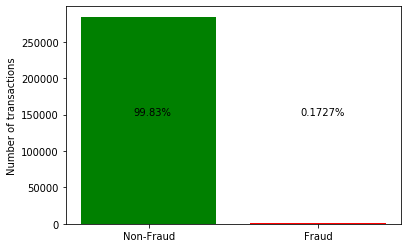

In [ ]:
plt.bar(['Non-Fraud','Fraud'], classes, color=['g','r'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share),(0.7, 0.5), xycoords='axes fraction')
plt.show()

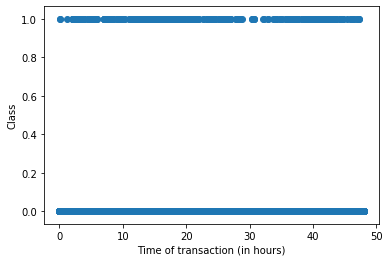

In [ ]:
df.Time=df.Time/(60*60)
plt.scatter(df['Time'], df['Class'])
plt.xlabel('Time of transaction (in hours)')
plt.ylabel('Class')
plt.show()

In [ ]:
df.drop('Time', axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


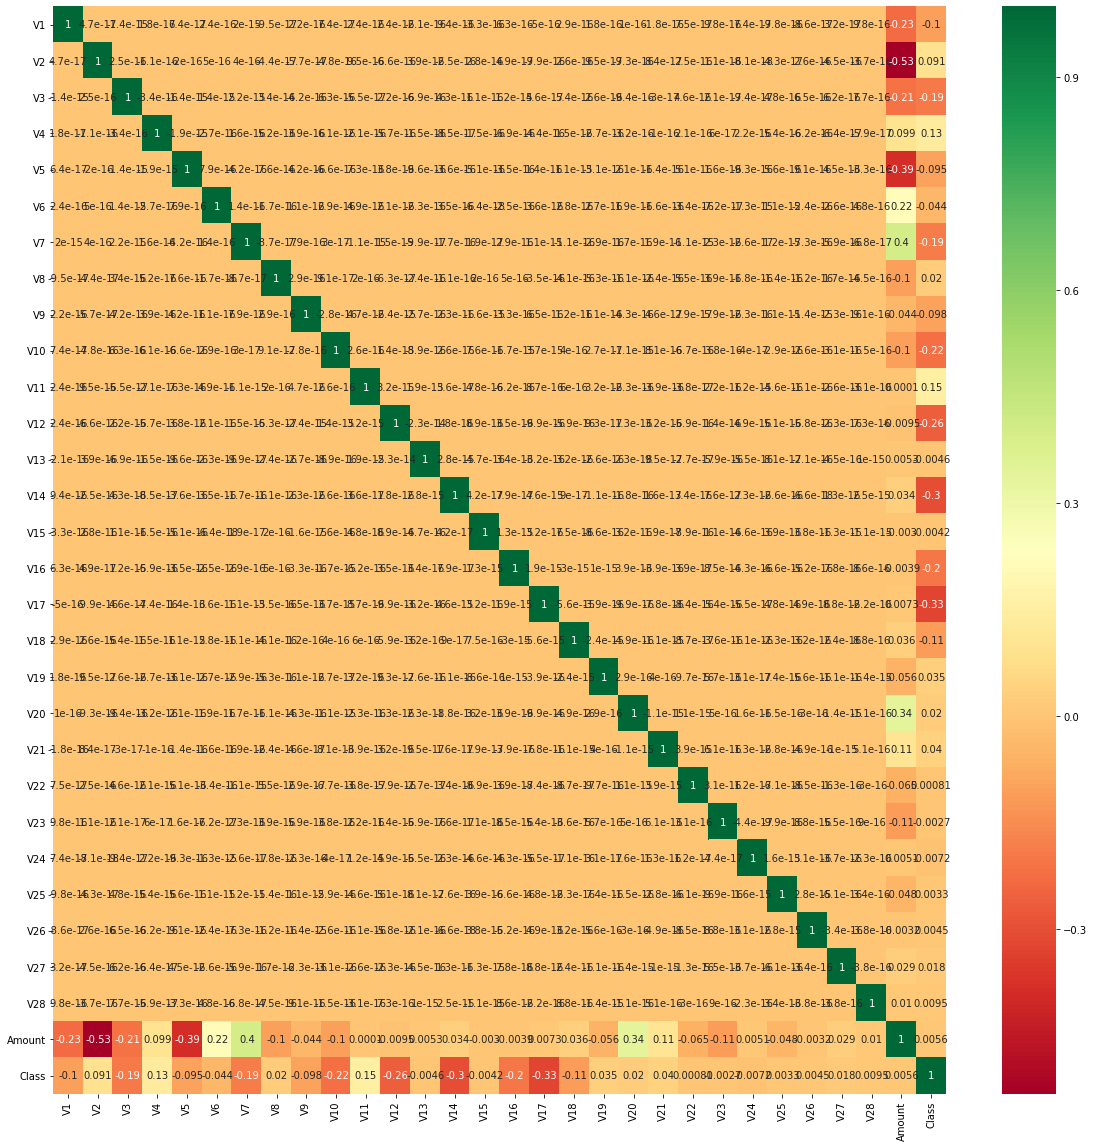

In [ ]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df[corrmat.index].corr(),annot=True,cmap="RdYlGn")

In [ ]:
y = df['Class']
df.drop('Class', axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


### Splitting the data into train & test data

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(df, y, stratify=y, random_state=0)

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
369
123


### Plotting the distribution of a variable

(array([ 1.,  0.,  0., ..., 57., 13.,  3.]),
 array([-56.40750963, -56.37995231, -56.35239499, ...,   2.39981535,
          2.42737267,   2.45492999]),
 <a list of 2136 Patch objects>)

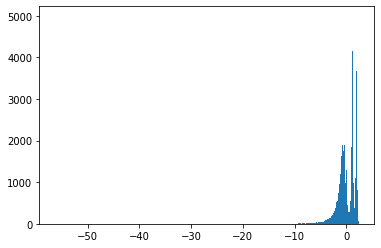

In [ ]:
import matplotlib.pyplot as plt

plt.hist(X_train.iloc[:,0], bins=int(X_train.shape[0]/100))

### Handling the skewness of the distribution & making it more gaussian

In [ ]:
from sklearn import preprocessing

pt = preprocessing.PowerTransformer(copy=False)
pt.fit_transform(X_train)
pt.transform(X_test)

from sklearn import metrics

(array([1., 0., 0., ..., 0., 0., 2.]),
 array([-8.50663242, -8.50177547, -8.49691852, ...,  1.85809652,
         1.86295347,  1.86781042]),
 <a list of 2136 Patch objects>)

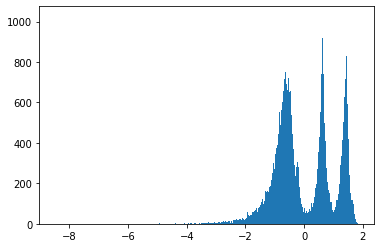

In [ ]:
plt.hist(X_train.iloc[:,0], bins=int(X_train.shape[0]/100))

## Model Building

In [ ]:
num_cv_splits = 3
skf = model_selection.StratifiedKFold(n_splits=num_cv_splits, shuffle=True, random_state=0)

In [ ]:
# Logistic Regression

from sklearn import linear_model

num_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
auc = np.zeros((len(num_C), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for C_id, C_val in enumerate(num_C):
        clf = linear_model.LogisticRegression(C=C_val, random_state=0, solver='lbfgs', max_iter=1000, n_jobs=-1)
        clf.fit(X_train_cv, y_train_cv)
        auc[C_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('C_val =', C_val, '; auc =', auc[C_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best C:', num_C[np.argmax(mean_auc)])
print('Best auc corresponding to Best C:', mean_auc[np.argmax(mean_auc)])
# Best C: 0.01
# Best auc corresponding to Best C: 0.9786616229813285

In [ ]:
# kNN

# sklearn.neighbors.KNeighborsClassifier is impractical beyond tens of thousands of samples!
from sklearn import neighbors

# num_neighbours = int(np.sum(y_train)*(num_cv_splits-1)/num_cv_splits) #Ideally, why?
num_neighbours = 31 #Why? Hint: Central Limit Theorem
auc = np.zeros((len(range(1, num_neighbours+1, 2)), num_cv_splits)) # Why increment of 2? Hint: Breaking Ties
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for kid, k in enumerate(range(1, num_neighbours+1, 2)):
        clf = neighbors.KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        clf.fit(X_train_cv, y_train_cv)
        auc[kid, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('Neighbour =', k, '; auc =', auc[kid, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best neighbour k:', 2*np.argmax(mean_auc)+1)
print('Best auc corresponding to Best neighbour:', mean_auc[np.argmax(mean_auc)])
# Best neighbour k: 29
# Best auc corresponding to Best neighbour: 0.9317972299445195

In [ ]:
# SVM Classifier

# sklearn.svm.SVC is impractical beyond tens of thousands of samples! Qudratic compute!
from sklearn import svm

num_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
auc = np.zeros((len(num_C), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for C_id, C_val in enumerate(num_C):
        clf = svm.SVC(C=C_val, kernel='rbf', gamma='scale', probability=True, cache_size=200, verbose=True,
                      random_state=0) # probability=True necessary for predict_proba
        clf.fit(X_train_cv, y_train_cv)
        auc[C_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('C_val =', C_val, '; auc =', auc[C_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best C:', num_C[np.argmax(mean_auc)])
print('Best auc corresponding to Best C:', mean_auc[np.argmax(mean_auc)])
# Best C: 1000.0
# Best auc corresponding to Best C: 0.9608051366817021

In [ ]:
# Decision Tree

from sklearn import tree

num_depth = range(2, 7)
num_min_samples_leaf = [30,50,100]
num_min_samples_split = [2,31]
auc = np.zeros((len(num_depth)*len(num_min_samples_leaf)*len(num_min_samples_split), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for depth_id, depth in enumerate(num_depth):
        for min_samples_leaf_id, min_samples_leaf in enumerate(num_min_samples_leaf):
            for min_samples_split_id, min_samples_split in enumerate(num_min_samples_split):
                clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                        min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split, random_state=0)
                clf.fit(X_train_cv, y_train_cv)
                auc_id = depth_id*len(num_min_samples_leaf)*len(num_min_samples_split)+\
                            min_samples_leaf_id*len(num_min_samples_split)+min_samples_split_id
                auc[auc_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('depth =', depth, '; min_samples_leaf =', min_samples_leaf, '; min_samples_split =',
                      min_samples_split, '; auc =', auc[auc_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
depth_id = np.argmax(mean_auc)//(len(num_min_samples_leaf)*len(num_min_samples_split))
min_samples_leaf_id = (np.argmax(mean_auc) - depth_id*len(num_min_samples_leaf)*len(num_min_samples_split))//len(
                       num_min_samples_split)
min_samples_split_id = (np.argmax(mean_auc) - depth_id*len(num_min_samples_leaf)*len(num_min_samples_split))%len(
                       num_min_samples_split)
print('Best depth:', num_depth[depth_id])
print('Best min_samples_leaf:', num_min_samples_leaf[min_samples_leaf_id])
print('Best min_samples_split:', num_min_samples_leaf[min_samples_split_id])
print('Best auc corresponding to Best depth, min_samples_leaf & min_samples_split :', mean_auc[np.argmax(mean_auc)])
# Best depth: 5
# Best min_samples_leaf: 100
# Best min_samples_split: 30
# Best auc corresponding to Best depth, min_samples_leaf & min_samples_split : 0.9536753976338588

In [ ]:
# Neural Network

import warnings
warnings.filterwarnings("ignore")

import os
import random
import tensorflow as tf

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

keep_track = []
cv_num = 0

random.seed(1)
np.random.seed(1)
tf.set_random_seed(1)
os.environ['PYTHONHASHSEED']='1'

for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    break

model = Sequential()
model.add(Dense(128, input_dim=X_train_cv.shape[1]))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
print(model.summary())

filepath = 'model-{epoch:05d}-{val_loss:.5f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False,
                             save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]
history = model.fit(X_train_cv, y_train_cv, epochs=10, verbose=1, callbacks=callbacks_list,
                        validation_data=(X_test_cv, y_test_cv))

In [ ]:
from keras.models import load_model
model = load_model('model-00004-0.00364.h5')
print('Best auc:', metrics.roc_auc_score(y_true = y_test_cv, y_score = model.predict_proba(X_test_cv)))
# Best auc: 0.9795857512029728

In [ ]:
# Random Forest

from sklearn import ensemble

initial_trees = 801
num_trees = 899
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])
# Best num_trees: 860
# Best auc corresponding to Best num_trees : 0.9813236660045673

In [ ]:
# XGBoost

from xgboost import XGBClassifier

num_depth = [3, 4]
learning_rate = [0.1, 0.2, 0.3]
initial_trees = 1126
num_trees = 500
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees)*len(num_depth)*len(learning_rate), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for lr_id, lr in enumerate(learning_rate):
        for depth_id, depth in enumerate(num_depth):
            clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30, n_estimators=initial_trees,
                                n_jobs=56)
            clf.fit(X_train_cv, y_train_cv)
            clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(initial_trees)+'_cv_num_'+str(cv_num)+\
                           '.model')
            auc_id = lr_id*len(num_depth)*len(trees)+depth_id*len(trees)
            auc[auc_id, cv_num] = metrics.roc_auc_score(
                y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
            print('learning rate =', lr, '; depth =', depth, '; num_trees = ', initial_trees, '; auc =', auc[auc_id,
                    cv_num], '; cv_num =', cv_num)
            for tree_id,tree in enumerate(trees[1:]):
                clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30,
                                    n_estimators=tree_increment, n_jobs=56)
                clf.fit(X_train_cv, y_train_cv, xgb_model=(
                    'lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(trees[tree_id])+'_cv_num_'+str(cv_num)+'.model'))
                clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(tree)+'_cv_num_'+str(cv_num)+'.model')
                auc_id = lr_id*len(num_depth)*len(trees)+depth_id*len(trees)+tree_id+1
                auc[auc_id, cv_num] = metrics.roc_auc_score(
                    y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('learning rate =', lr, '; depth =', depth, '; num_trees =', tree, '; auc =', auc[auc_id,
                        cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
lr_id = np.argmax(mean_auc)//(len(num_depth)*len(trees))
depth_id = (np.argmax(mean_auc) - lr_id*len(num_depth)*len(trees))//len(trees)
tree_id = (np.argmax(mean_auc) - lr_id*len(num_depth)*len(trees))%len(trees)
print('Best Learning Rate:', learning_rate[lr_id])
print('Best Depth:', num_depth[depth_id])
print('Best Trees:', trees[tree_id])
print('Best auc corresponding to Best Learning Rate, Depth & Trees :', mean_auc[np.argmax(mean_auc)])
# Best Learning Rate: 0.2
# Best Depth: 3
# Best Trees: 109
# Best auc corresponding to Best Learning Rate, Depth & Trees : 0.9803831434994882

In [ ]:
# Just with the available data, Random Forest works best with AUC 0.9813236660045673

from sklearn import ensemble

clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0, n_estimators=860)
clf.fit(X_train, y_train)
print('Test auc =', metrics.roc_auc_score(y_true = y_test, y_score = clf.predict_proba(X_test)[:,1]))
# Test auc = 0.9786089381596133

Test auc = 0.9786089381596133


Top var = 17
2nd Top var = 14
3rd Top var = 10


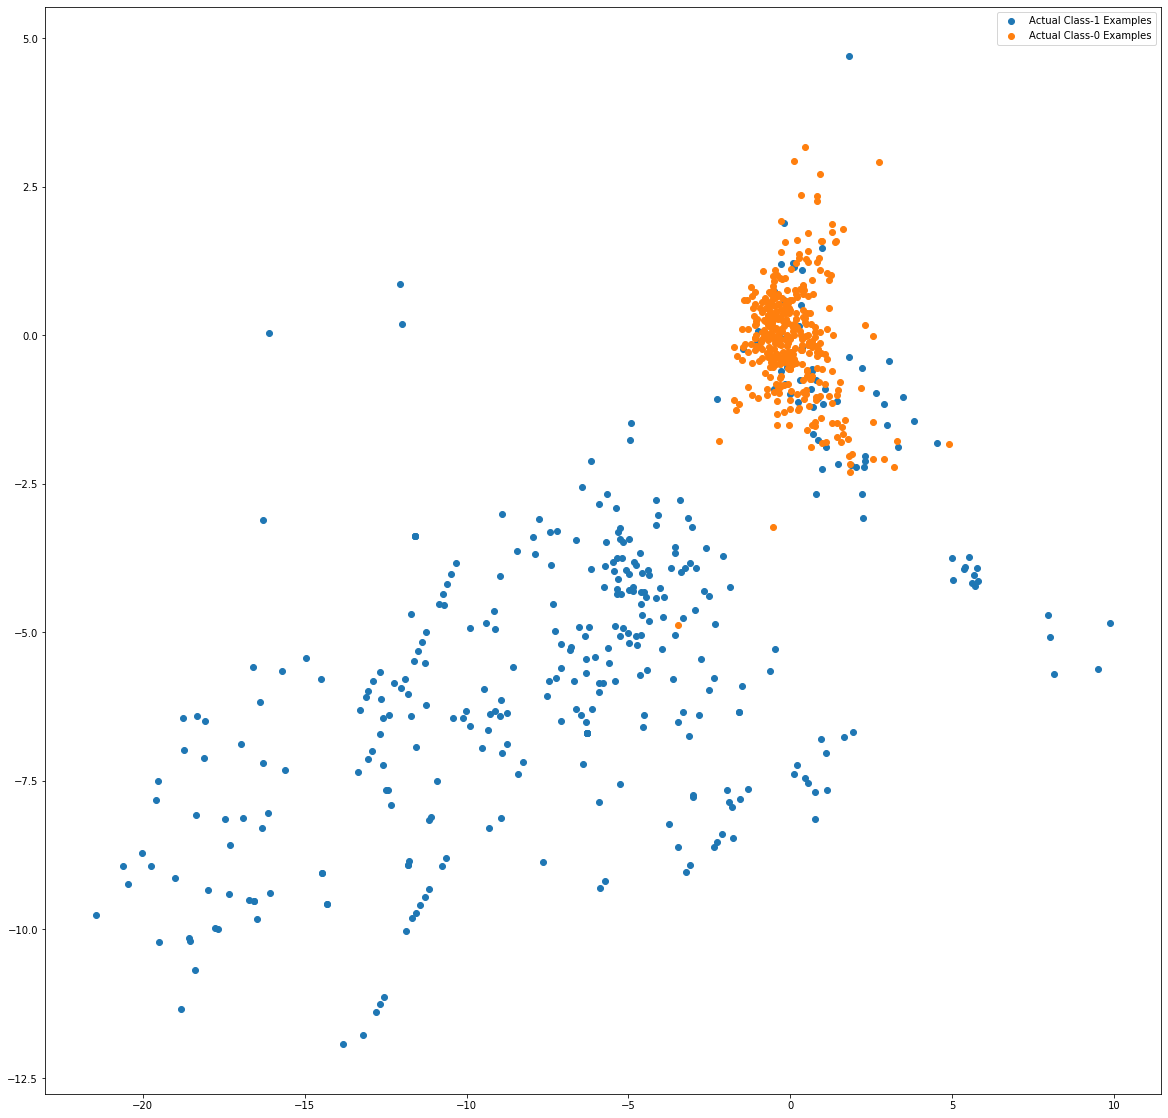

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

In [ ]:
# Uniform Oversampling Random Forest

import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble

initial_trees = 600
num_trees = 700
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0, class_weight='balanced_subsample')
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])
# Best num_trees: 691
# Best auc corresponding to Best num_trees : 0.9815485123778448

In [ ]:
# Uniform Oversampling XGBoost

from xgboost import XGBClassifier

num_depth = [3, 4, 5]
learning_rate = [0.09, 0.1, 0.11]
initial_trees = 2
num_trees = 500
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees)*len(num_depth)*len(learning_rate), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    weights = np.ones((y_train_cv.shape[0], 1))
    weights[np.where(y_train_cv==1.0)] = (y_train_cv.shape[0]-np.sum(y_train_cv))/np.sum(y_train_cv)
    for lr_id, lr in enumerate(learning_rate):
        for depth_id, depth in enumerate(num_depth):
            clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30, n_estimators=initial_trees,
                                n_jobs=56)
            clf.fit(X_train_cv, y_train_cv)
            clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(initial_trees)+'_cv_num_'+str(cv_num)+\
                           '.model')
            auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num] = metrics.roc_auc_score(
                y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
            print('learning rate =', lr, '; depth =', depth, '; num_trees = ', initial_trees, '; auc =',
                  auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num], '; cv_num =', cv_num)
            for tree_id,tree in enumerate(trees[1:]):
                clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30,
                                    n_estimators=tree_increment, n_jobs=56)
                clf.fit(X_train_cv, y_train_cv, xgb_model=(
                    'lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(trees[tree_id])+'_cv_num_'+str(cv_num)+'.model'))
                clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(tree)+'_cv_num_'+str(cv_num)+'.model')
                auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num] = metrics.roc_auc_score(
                    y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('learning rate =', lr, '; depth =', depth, '; num_trees =', tree, '; auc =',
                      auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num],
                      '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
lr_id = np.argmax(mean_auc)//(len(trees)*len(num_depth))
depth_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))//len(trees)
tree_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))%len(trees)
print('Best Learning Rate:', learning_rate[lr_id])
print('Best Depth:', num_depth[depth_id])
print('Best Trees:', trees[tree_id])
print('Best auc corresponding to Best Learning Rate, Depth & Trees :', mean_auc[np.argmax(mean_auc)])
# Best Learning Rate: 0.11
# Best Depth: 4
# Best Trees: 285
# Best auc corresponding to Best Learning Rate, Depth & Trees : 0.9836065401641519

In [ ]:
# Random Oversampling Random Forest

import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

initial_trees = 2
num_trees = 1000
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    ros = over_sampling.RandomOverSampler(random_state=0)
    X_train_cv, y_train_cv = ros.fit_resample(X_train_cv, y_train_cv)
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])
# Best num_trees: 881
# Best auc corresponding to Best num_trees : 0.9825061585993745  

In [ ]:
# Random Oversampling XGBoost

from xgboost import XGBClassifier
from imblearn import over_sampling

num_depth = [3, 4]
learning_rate = [0.11, 0.12]
initial_trees = 2
num_trees = 500
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees)*len(num_depth)*len(learning_rate), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    ros = over_sampling.RandomOverSampler(random_state=0)
    X_train_cv, y_train_cv = ros.fit_resample(X_train_cv, y_train_cv)
    for lr_id, lr in enumerate(learning_rate):
        for depth_id, depth in enumerate(num_depth):
            clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30, n_estimators=initial_trees,
                                n_jobs=56)
            clf.fit(X_train_cv, y_train_cv)
            clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(initial_trees)+'_cv_num_'+str(cv_num)+\
                           '.model')
            auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num] = metrics.roc_auc_score(
                y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
            print('learning rate =', lr, '; depth =', depth, '; num_trees = ', initial_trees, '; auc =',
                  auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num], '; cv_num =', cv_num)
            for tree_id,tree in enumerate(trees[1:]):
                clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30,
                                    n_estimators=tree_increment, n_jobs=56)
                clf.fit(X_train_cv, y_train_cv, xgb_model=(
                    'lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(trees[tree_id])+'_cv_num_'+str(cv_num)+'.model'))
                clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(tree)+'_cv_num_'+str(cv_num)+'.model')
                auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num] = metrics.roc_auc_score(
                    y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('learning rate =', lr, '; depth =', depth, '; num_trees =', tree, '; auc =',
                      auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num],
                      '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
lr_id = np.argmax(mean_auc)//(len(trees)*len(num_depth))
depth_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))//len(trees)
tree_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))%len(trees)
print('Best Learning Rate:', learning_rate[lr_id])
print('Best Depth:', num_depth[depth_id])
print('Best Trees:', trees[tree_id])
print('Best auc corresponding to Best Learning Rate, Depth & Trees :', mean_auc[np.argmax(mean_auc)])
# Best Learning Rate: 0.11
# Best Depth: 4
# Best Trees: 285
# Best auc corresponding to Best Learning Rate, Depth & Trees : 0.9836065401641519

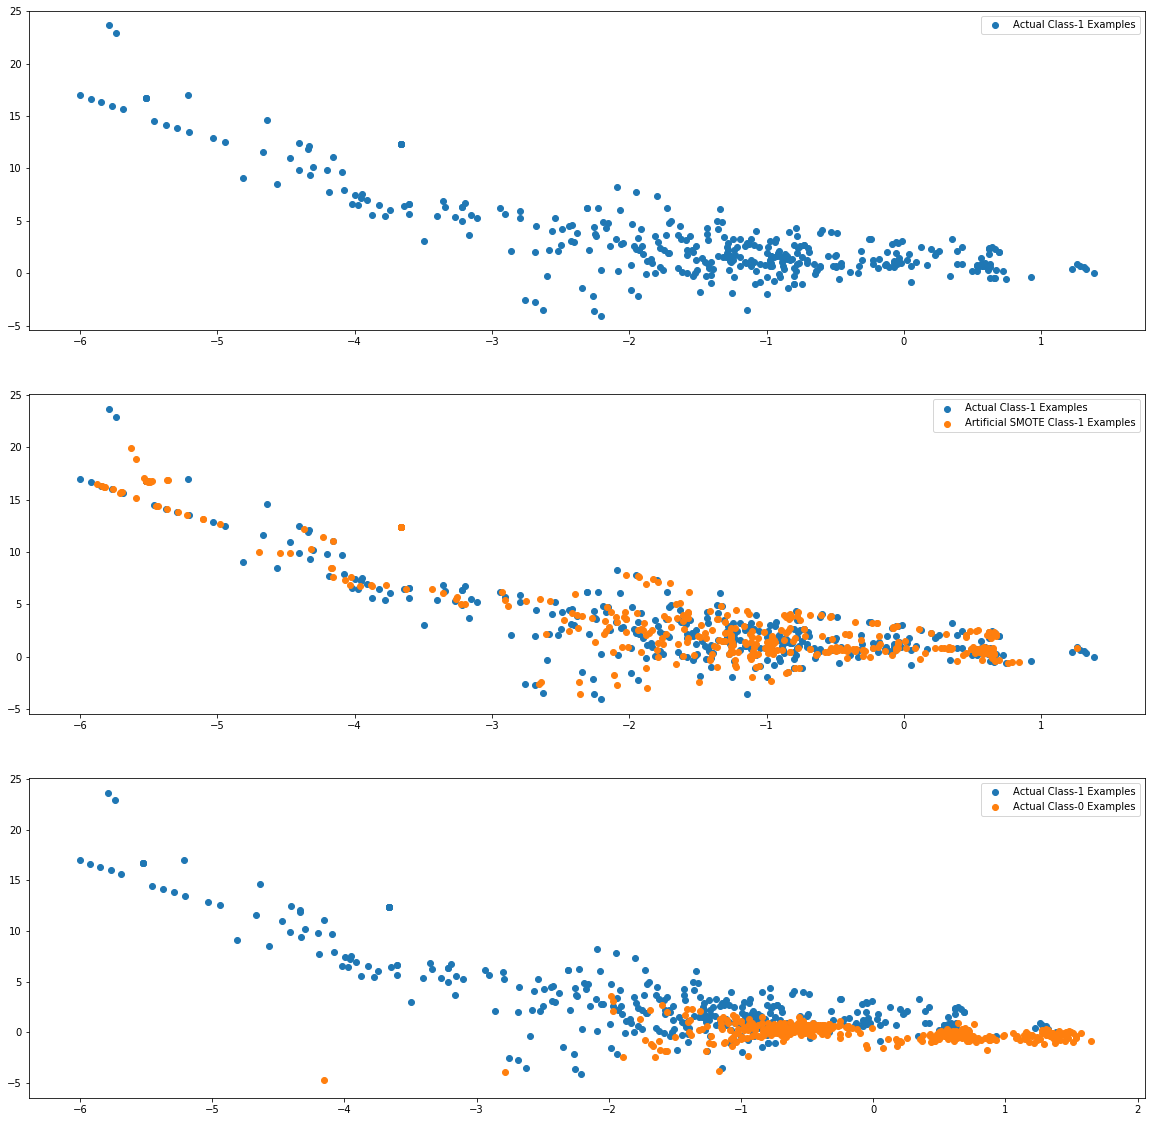

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# SMOTE Random Forest

import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

initial_trees = 750
num_trees = 1000
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    sm = over_sampling.SMOTE(random_state=0)
    X_train_cv, y_train_cv = sm.fit_resample(X_train_cv, y_train_cv)
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])
# Best num_trees: 918
# Best auc corresponding to Best num_trees : 0.9854879396299591

In [ ]:
# SMOTE XGBoost

from xgboost import XGBClassifier
from imblearn import over_sampling

num_depth = [4, 5]
learning_rate = [0.14, 0.15]
initial_trees = 1126
num_trees = 1224
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees)*len(num_depth)*len(learning_rate), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    sm = over_sampling.SMOTE(random_state=0)
    X_train_cv, y_train_cv = sm.fit_resample(X_train_cv, y_train_cv)
    for lr_id, lr in enumerate(learning_rate):
        for depth_id, depth in enumerate(num_depth):
            clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30, n_estimators=initial_trees,
                                n_jobs=56)
            clf.fit(X_train_cv, y_train_cv)
            clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(initial_trees)+'_cv_num_'+str(cv_num)+\
                           '.model')
            auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num] = metrics.roc_auc_score(
                y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
            print('learning rate =', lr, '; depth =', depth, '; num_trees = ', initial_trees, '; auc =',
                  auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num], '; cv_num =', cv_num)
            for tree_id, tree in enumerate(trees[1:]):
                clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30,
                                    n_estimators=tree_increment, n_jobs=56)
                clf.fit(X_train_cv, y_train_cv, xgb_model=(
                    'lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(trees[tree_id])+'_cv_num_'+str(cv_num)+'.model'))
                clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(tree)+'_cv_num_'+str(cv_num)+'.model')
                auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num] = metrics.roc_auc_score(
                    y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('learning rate =', lr, '; depth =', depth, '; num_trees =', tree, '; auc =',
                      auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num],
                      '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
lr_id = np.argmax(mean_auc)//(len(trees)*len(num_depth))
depth_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))//len(trees)
tree_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))%len(trees)
print('Best Learning Rate:', learning_rate[lr_id])
print('Best Depth:', num_depth[depth_id])
print('Best Trees:', trees[tree_id])
print('Best auc corresponding to Best Learning Rate, Depth & Trees :', mean_auc[np.argmax(mean_auc)])
# Best Learning Rate: 0.15
# Best Depth: 5
# Best Trees: 1173
# Best auc corresponding to Best Learning Rate, Depth & Trees : 0.9820740165368663

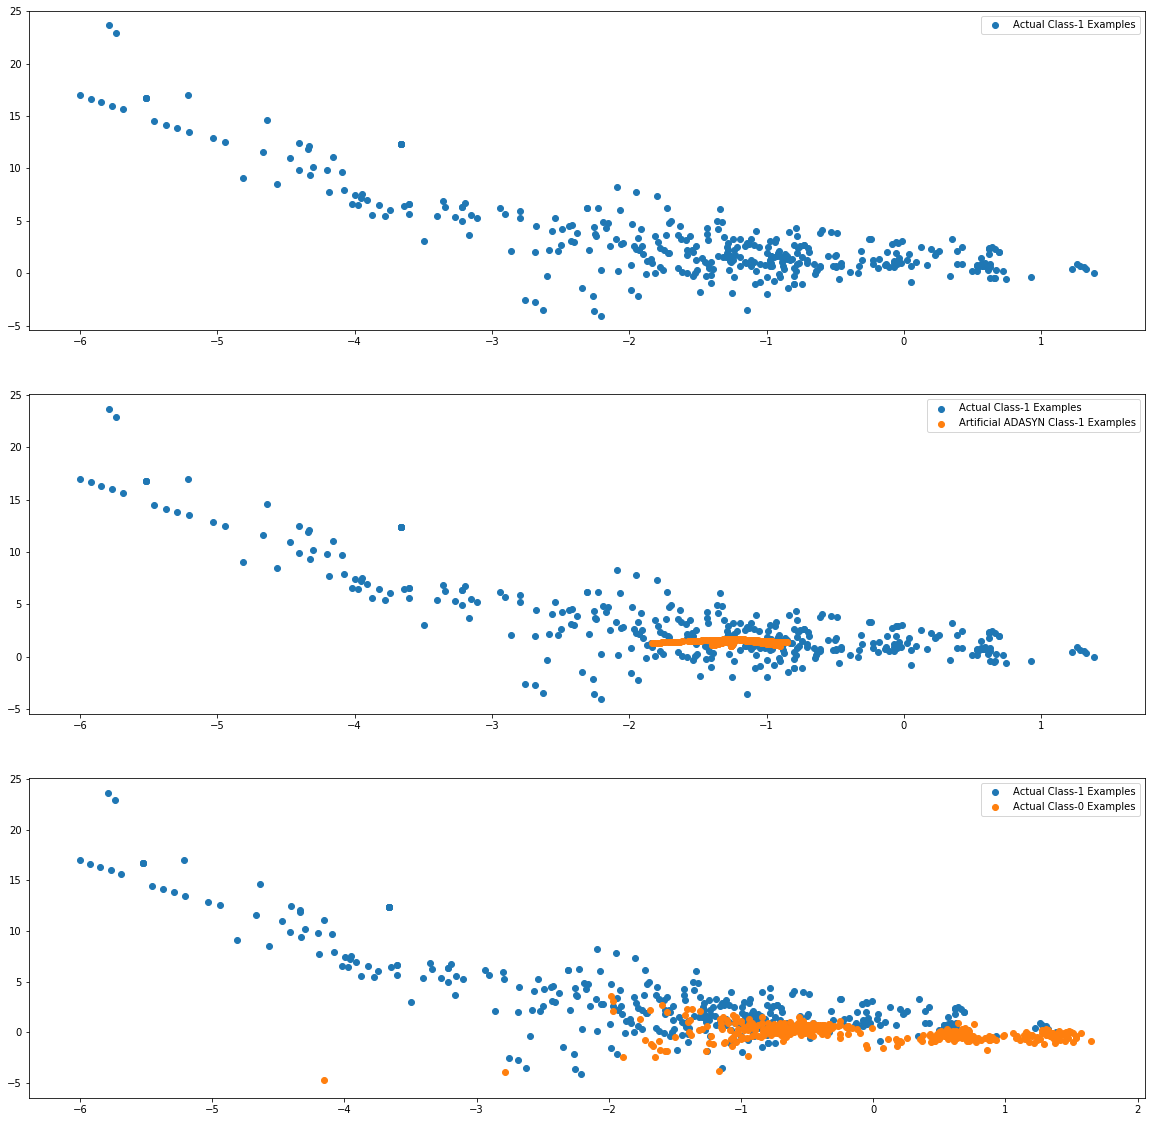

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
# ADASYN Random Forest

import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

initial_trees = 800
num_trees = 900
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    ada = over_sampling.ADASYN(random_state=0)
    X_train_cv, y_train_cv = ada.fit_resample(X_train_cv, y_train_cv)
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
        print('num_trees =', tree, '; auc =', auc[tree_id, cv_num], '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])
# Best num_trees: 847
# Best auc corresponding to Best num_trees : 0.9847391621818096

In [ ]:
# ADASYN XGBoost

from xgboost import XGBClassifier
from imblearn import over_sampling

num_depth = [3, 4]
learning_rate = [0.13, 0.14]
initial_trees = 20
num_trees = 40
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees)*len(num_depth)*len(learning_rate), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    ada = over_sampling.ADASYN(random_state=0)
    X_train_cv, y_train_cv = ada.fit_resample(X_train_cv, y_train_cv)
    for lr_id, lr in enumerate(learning_rate):
        for depth_id, depth in enumerate(num_depth):
            clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30, n_estimators=initial_trees,
                                n_jobs=56)
            clf.fit(X_train_cv, y_train_cv)
            clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(initial_trees)+'_cv_num_'+str(cv_num)+\
                           '.model')
            auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num] = metrics.roc_auc_score(
                y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
            print('learning rate =', lr, '; depth =', depth, '; num_trees = ', initial_trees, '; auc =',
                  auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees), cv_num], '; cv_num =', cv_num)
            for tree_id, tree in enumerate(trees[1:]):
                clf = XGBClassifier(learning_rate=lr, max_depth=depth, min_child_weight=30,
                                    n_estimators=tree_increment, n_jobs=56)
                clf.fit(X_train_cv, y_train_cv, xgb_model=(
                    'lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(trees[tree_id])+'_cv_num_'+str(cv_num)+'.model'))
                clf.save_model('lr_'+str(lr)+'_depth_'+str(depth)+'_tree_'+str(tree)+'_cv_num_'+str(cv_num)+'.model')
                auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num] = metrics.roc_auc_score(
                    y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
                print('learning rate =', lr, '; depth =', depth, '; num_trees =', tree, '; auc =',
                      auc[lr_id*len(trees)*len(num_depth)+depth_id*len(trees)+tree_id+1, cv_num],
                      '; cv_num =', cv_num)
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
lr_id = np.argmax(mean_auc)//(len(trees)*len(num_depth))
depth_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))//len(trees)
tree_id = (np.argmax(mean_auc) - lr_id*len(trees)*len(num_depth))%len(trees)
print('Best Learning Rate:', learning_rate[lr_id])
print('Best Depth:', num_depth[depth_id])
print('Best Trees:', trees[tree_id])
print('Best auc corresponding to Best Learning Rate, Depth & Trees :', mean_auc[np.argmax(mean_auc)])
# Best Learning Rate: 0.12
# Best Depth: 3
# Best Trees: 28
# Best auc corresponding to Best Learning Rate, Depth & Trees : 0.9811422928644257

In [ ]:
# With all the oversampling methods, SMOTE with Random Forest works best with AUC 0.9854879396299591

import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, n_jobs=-1, random_state=0,
                                      n_estimators=918)
clf.fit(X_train_smote, y_train_smote)
print('Test auc =', metrics.roc_auc_score(y_true = y_test, y_score = clf.predict_proba(X_test)[:,1]))
# Without oversampling Test auc = 0.9786089381596133
# Final Test auc = 0.9854802574531465 !!

Test auc = 0.9854802574531465


Top var = 14
2nd Top var = 10
3rd Top var = 17


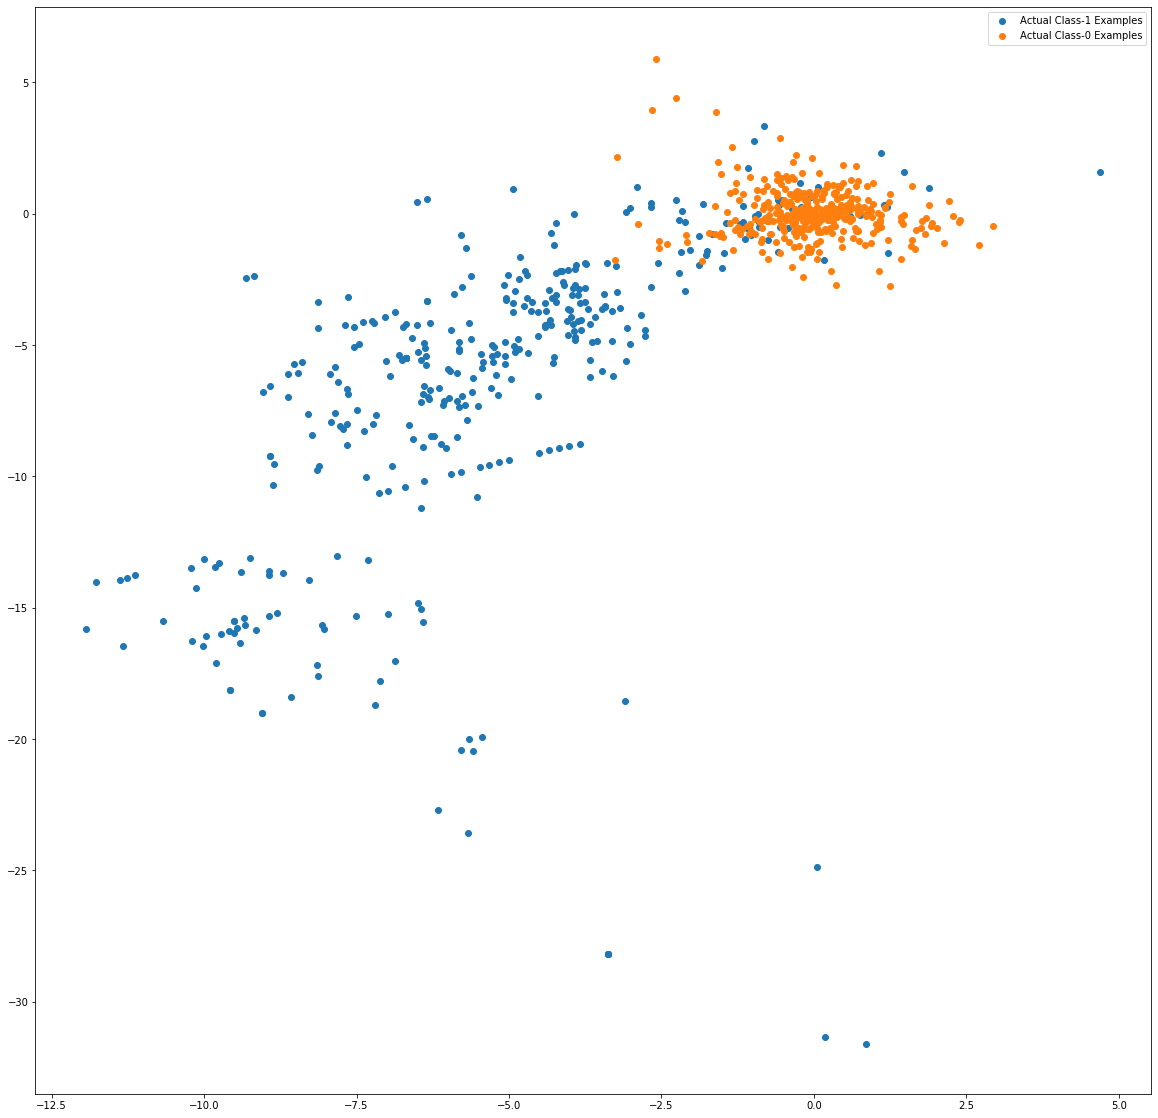

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
##### print('Train auc =', metrics.roc_auc_score(y_true = y_train_smote, y_score = clf.predict_proba(X_train_smote)[:,1]))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, clf.predict_proba(X_train_smote)[:,1])
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.584999074495035
